20213043 이세현

k-means 구현

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def assign(point, centroids, k): # point가 어떤 centroid에 속하는지 알려주는 함수
    return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i] - point))

In [3]:
def compute_centroids(assignments, points, k): # 0으로 초기화된 k개의 벡터 합
    vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
    counts = [0] * k

    for i, p in zip(assignments, points):
        vec_sum[i] += p
        counts[i] += 1

    return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

In [4]:
def kmeans(k, points):
    prev_assignment = []

    centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]

    for epoch in range(10): # -> 무한대(변화가 없을 때까지)
        assignments = [assign(p, centroids, k) for p in points]
        centroids = compute_centroids(assignments, points, k)
        if prev_assignment == assignments:
            break
        prev_assignment = assignments
    return assignments, centroids

In [5]:
# 데이터 생성
k = 3

points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

assignments, centroids = kmeans(k, points)

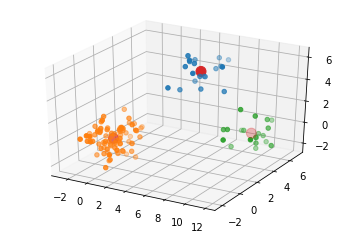

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
    clusters[a].append(p)
for cluster in clusters:
    ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s=100)
plt.show()

이미지 처리 응용

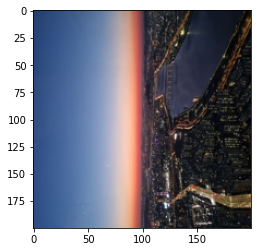

In [7]:
from PIL import Image

im = Image.open("20220327_191921.jpg")

width = 200
height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()

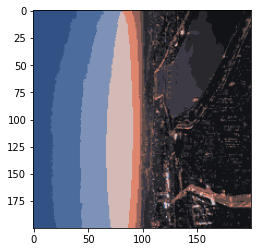

In [8]:
pixels = np.array(im).reshape(-1, 3)
assignments, centroids = kmeans(10, pixels)

for a, i in zip(assignments, range(pixels.shape[0])):
    pixels[i] = centroids[a]

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()

k-means using sklearn

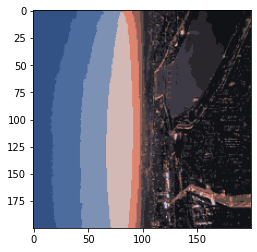

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(pixels)

for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
    pixels[i] = kmeans.cluster_centers_[a]

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()